In [58]:
%matplotlib inline

import numpy as np
import scipy
import xray
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [59]:
def hydrograph_overlap(obs, mod, by='month', return_data=False):
    '''
    Calculate the overlap statistic from [Perkins et al., 2007]
    (http://dx.doi.org/10.1175/Jcli4253.1)
       
    Parameters
    ----------
    obs, mod : Pandas.Series
        Series to calculate the overlap statistic on
    by : str, function, or Pandas.Grouper
        groupby directive
    return_data : bool (default=False)
        If True, return the normalized hydrographs in addition to the overlap statistic.
        
    Returns
    -------
    overlap : float
        Overlap statistic calculated from `obs` and `mod`
    '''
    
    # groupby functions
    if by == 'month':
        by = lambda x: x.month
    elif by == 'yday':
        by = lambda x: x.timetuple().tm_yday
    
    # align the series and create a pandas.DataFrame
    obs, mod = obs.align(mod, join='outer')
    df = pd.DataFrame({'obs': obs, 'mod': mod}, copy=True)
    
    # Drop any missing values
    df.dropna(axis=0, how='any', inplace=True)
    
    # Groupby "by"
    groups = df.groupby(by=by).mean()
    
    # normalize the mean grouped hydrographs
    groups /= groups.sum()
    
    # Return the overlap statistic
    overlap_stat = np.minimum(groups['obs'], groups['mod']).sum()
    
    if return_data:
        return overlap_stat, groups
    return overlap_stat

In [60]:
ds05 = xray.open_dataset('/Users/jhamman/workdir/RVIC_test/dai2006_0.5_calib/hist/dai2006_0.5_calib.rvic.h1a.1989-10-02.nc')
ds05 = ds05.resample('MS', 'time')
ds05 = ds05.groupby('time.month').mean()

In [61]:
ds1 = xray.open_dataset('/Users/jhamman/workdir/RVIC_test/dai2006_1_calib/hist/dai2006_1_calib.rvic.h1a.1989-10-02.nc')
ds1 = ds1.resample('MS', 'time')
ds1 = ds1.groupby('time.month').mean()

In [62]:
ds15 = xray.open_dataset('/Users/jhamman/workdir/RVIC_test/dai2006_1.5_calib/hist/dai2006_1.5_calib.rvic.h1a.1989-10-02.nc')
ds15 = ds15.resample('MS', 'time')
ds15 = ds15.groupby('time.month').mean()

In [63]:
ds2 = xray.open_dataset('/Users/jhamman/workdir/RVIC_test/dai2006_2_calib/hist/dai2006_2_calib.rvic.h1a.1989-10-02.nc')
ds2 = ds2.resample('MS', 'time')
ds2 = ds2.groupby('time.month').mean()


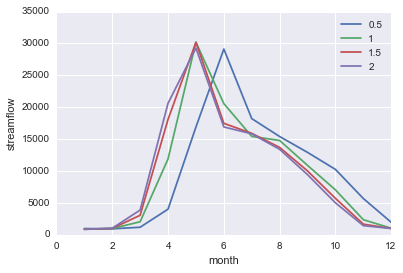

In [64]:
ds05.streamflow.plot(label='0.5')
ds1.streamflow.plot(label='1')
ds15.streamflow.plot(label='1.5')
ds2.streamflow.plot(label='2')
plt.legend()

In [65]:
ds202000 = xray.open_dataset('/Users/jhamman/workdir/RVIC_test/dai2006_2_calib/hist/dai2006_2_calib.rvic.h1a.1989-10-02.nc')
ds102000 = xray.open_dataset('/Users/jhamman/workdir/RVIC_test/dai2006_1_calib/hist/dai2006_1_calib.rvic.h1a.1989-10-02.nc')
ds052000 = xray.open_dataset('/Users/jhamman/workdir/RVIC_test/dai2006_0.5_calib/hist/dai2006_0.5_calib.rvic.h1a.1989-10-02.nc')
ds054000 = xray.open_dataset('/Users/jhamman/workdir/RVIC_test/dai2006_0.5_4000_calib/hist/dai2006_0.5_4000_calib.rvic.h1a.1989-10-02.nc')

In [66]:
obs = xray.open_dataset('coastal-stns-Vol-monthly.updated-oct2007.nc', decode_times=False)
obs['time'] = pd.date_range(start='1900-01-01', end='2006-12-31', freq='MS')

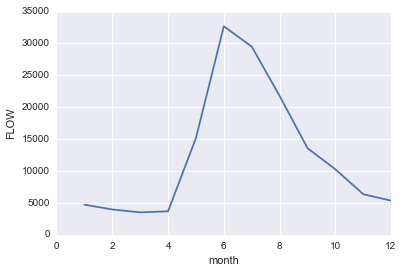

In [67]:
obs.isel(station=12).groupby('time.month').mean()['FLOW'].plot()

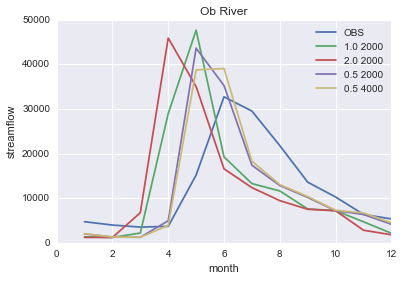

In [69]:
obs.isel(station=12).groupby('time.month').mean()['FLOW'].plot(label='OBS')
ds102000.isel(outlets=0).groupby('time.month').mean()['streamflow'].plot(label='1.0 2000')
ds202000.isel(outlets=0).groupby('time.month').mean()['streamflow'].plot(label='2.0 2000')
ds052000.isel(outlets=0).groupby('time.month').mean()['streamflow'].plot(label='0.5 2000')
ds054000.isel(outlets=0).groupby('time.month').mean()['streamflow'].plot(label='0.5 4000')
plt.legend()
plt.title('Ob River')

0.8268776854099171


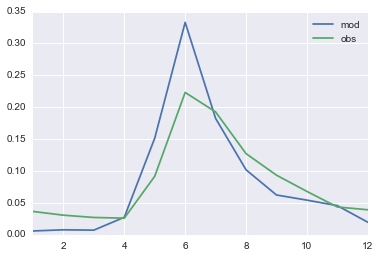

In [70]:
stat, data = hydrograph_overlap(obs['FLOW'].isel(station=12).to_series(),
                                ds052000['streamflow'].isel(outlets=6).to_series().resample('MS', how='mean'),
                                return_data=True)
data.plot()
print(stat)

0.5965934375713661


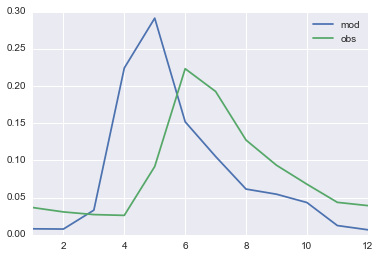

In [71]:
stat, data = hydrograph_overlap(obs['FLOW'].isel(station=12).to_series(),
#                                 obs['FLOW'].isel(station=12).to_series(),
                                ds202000['streamflow'].isel(outlets=6).to_series().resample('MS', how='mean'),
                                return_data=True)
data.plot()
print(stat)

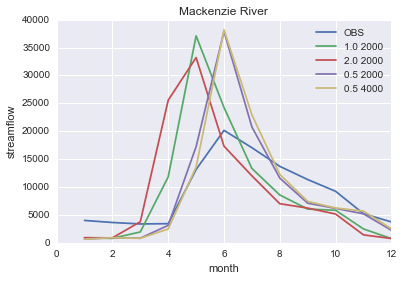

In [72]:
obs.isel(station=18).groupby('time.month').mean()['FLOW'].plot(label='OBS')
ds102000.isel(outlets=6).groupby('time.month').mean()['streamflow'].plot(label='1.0 2000')
ds202000.isel(outlets=6).groupby('time.month').mean()['streamflow'].plot(label='2.0 2000')
ds052000.isel(outlets=6).groupby('time.month').mean()['streamflow'].plot(label='0.5 2000')
ds054000.isel(outlets=6).groupby('time.month').mean()['streamflow'].plot(label='0.5 4000')
plt.legend()
plt.title('Mackenzie River')

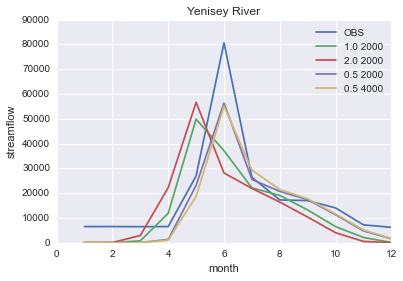

In [73]:
obs.isel(station=6).groupby('time.month').mean()['FLOW'].plot(label='OBS')
ds102000.isel(outlets=2).groupby('time.month').mean()['streamflow'].plot(label='1.0 2000')
ds202000.isel(outlets=2).groupby('time.month').mean()['streamflow'].plot(label='2.0 2000')
ds052000.isel(outlets=2).groupby('time.month').mean()['streamflow'].plot(label='0.5 2000')
ds054000.isel(outlets=2).groupby('time.month').mean()['streamflow'].plot(label='0.5 4000')
plt.legend()
plt.title('Yenisey River')

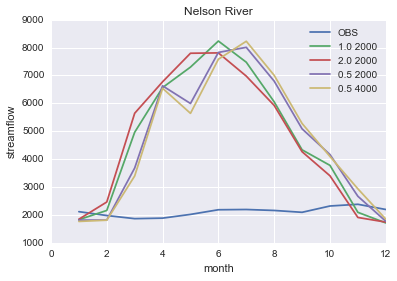

In [75]:
obs.isel(station=31).groupby('time.month').mean()['FLOW'].plot(label='OBS')
ds102000.isel(outlets=7).groupby('time.month').mean()['streamflow'].plot(label='1.0 2000')
ds202000.isel(outlets=7).groupby('time.month').mean()['streamflow'].plot(label='2.0 2000')
ds052000.isel(outlets=7).groupby('time.month').mean()['streamflow'].plot(label='0.5 2000')
ds054000.isel(outlets=7).groupby('time.month').mean()['streamflow'].plot(label='0.5 4000')
plt.legend()
plt.title('Nelson River')

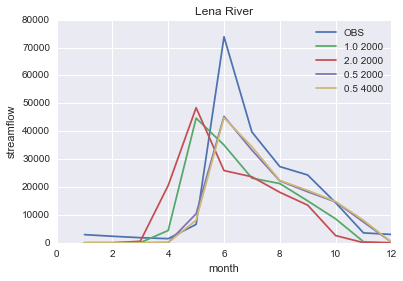

In [76]:
obs.isel(station=8).groupby('time.month').mean()['FLOW'].plot(label='OBS')
ds102000.isel(outlets=4).groupby('time.month').mean()['streamflow'].plot(label='1.0 2000')
ds202000.isel(outlets=4).groupby('time.month').mean()['streamflow'].plot(label='2.0 2000')
ds052000.isel(outlets=4).groupby('time.month').mean()['streamflow'].plot(label='0.5 2000')
ds054000.isel(outlets=4).groupby('time.month').mean()['streamflow'].plot(label='0.5 4000')
plt.legend()
plt.title('Lena River')

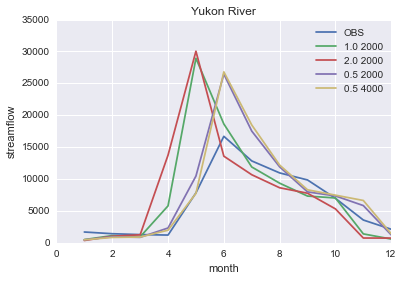

In [77]:
obs.isel(station=23).groupby('time.month').mean()['FLOW'].plot(label='OBS')
ds102000.isel(outlets=5).groupby('time.month').mean()['streamflow'].plot(label='1.0 2000')
ds202000.isel(outlets=5).groupby('time.month').mean()['streamflow'].plot(label='2.0 2000')
ds052000.isel(outlets=5).groupby('time.month').mean()['streamflow'].plot(label='0.5 2000')
ds054000.isel(outlets=5).groupby('time.month').mean()['streamflow'].plot(label='0.5 4000')
plt.legend()
plt.title('Yukon River')

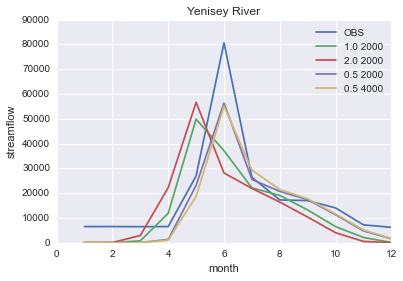

In [81]:
obsi = 6
dsi = 2

obs.isel(station=obsi).groupby('time.month').mean()['FLOW'].plot(label='OBS')
ds102000.isel(outlets=dsi).groupby('time.month').mean()['streamflow'].plot(label='1.0 2000')
ds202000.isel(outlets=dsi).groupby('time.month').mean()['streamflow'].plot(label='2.0 2000')
ds052000.isel(outlets=dsi).groupby('time.month').mean()['streamflow'].plot(label='0.5 2000')
ds054000.isel(outlets=dsi).groupby('time.month').mean()['streamflow'].plot(label='0.5 4000')
plt.legend()
plt.title('Yenisey River')

In [80]:
ds054000.outlet_name

<xray.DataArray 'outlet_name' (outlets: 8)>
array([b'Ob_at_Salekhard', b'Pechora_at_Oksino_Rus',
       b'Yenisey_at_Igarka_Rus', b'Amur_at_Komsomolsk',
       b'Lena_at_Kusur_Russ', b'Yukon_at_Pilot_Stn',
       b'Mackenzie_at_Arctic_Red', b'Nelson_at_us_Bladder'], 
      dtype='|S256')
Coordinates:
  * outlets  (outlets) int64 0 1 2 3 4 5 6 7
Attributes:
    long_name: Outlet guage name
    units: unitless

<xray.DataArray 'streamflow' (month: 12)>
array([  2.12691875e-05,   2.12691875e-05,   5.27563035e-03,
         2.60175404e-01,   1.15425323e+00,   2.20552134e-01,
         1.63727387e-01,   1.07777286e-01,   1.61314266e-01,
         9.42260981e-02,   1.32651592e-02,   2.12691875e-05])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12